# Ejercicio 1

#### En clase vimos que la función `bits` permite ver la representación binaria de números de punto flotante (`Float64`) o de enteros (e.g., `Int64`). En particular, para números de punto flotante, el primer bit es el signo, los siguiente 11 son el *exponente* y el resto es la representación binaria (sin el 1 del principio), del número en cuestión.

#### La pregunta es ¿qué significa el exponente?

In [3]:
bits(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

Proviene de la representación del $1.0$ en notación de *punto flotante*.
Queremos encontrar $d_0 \dots, d_n$ tales que $1.0 = d_0. d_1 \cdots d_n \times 2^e$, en representación binaria.
Cuando pasamos $1.0$ en binario tenemos: $d_0 = 1$, $d_1 = 0$, pudiendo escribir:

$$1.0_{10} = 1.0_2 \times 2^0$$

Lo que que está del lado derecho del punto se conoce como *mantisa*.
El exponente sobre el $2$ se llama *exponente* ($e$, para nuestro caso $e=0$).

La notación de punto flotante es la siguiente:

`1-bit del signo | 11-bits de exponente residual |52-bits de la mantisa`.

donde el valor de *exponente residual* depende de la precisión que elijamos:

1.Sencilla (32 bits):  
    $127 + e$
    
2.Doble (64 btis):  
    $1023 + e$.

En nuestro caso, el número es positivo, luego el bit del signo es `0`. 
La mantisa es $0$.
Y el exponente residual es $1023 + e = 1023 + 0 = 1023$.

Escribimos este último numerote en binario, obteniendo el exponente residual: $01111111111$.

Ponemos todo junto y obtenemos:

`0|01111111111|00000000000000000000000000000000000000000000000000000`.



# Ejercicio 2

Para averiguar qué números $a$ y $b$, sumados o restados a $1.0$ satisfacen $1.0 + a = 1.0$ y $1.0 - b = 1.0$, siguiendo las recomendaciones del profesor Luis Benet, hice esto:

In [4]:
a = 1.0

pregunta = true

while pregunta
    a = a*0.5
    pregunta = (1.0 + a) > 1.0
end
println("El número pequeño que cumple a + 1.0 = 1.0 es  ", a)
println("\n ¿a + 1.0 > 1.0 ? \n Respuesta:", pregunta)


El número pequeño que cumple a + 1.0 = 1.0 es  1

In [5]:
b = 1.0

pregunta = true

while pregunta
    b = b*0.5
    pregunta = (1.0 - b) < 1.0
end
println("El número pequeño que cumple 1.0 -b = 1.0 es  ", b)
println("\n ¿1.0 - b < 1.0 ? \n Respuesta:", pregunta)

Buscando en Wikipedia, encontré algo relacionado con el *épsilon de la máquina*; una cantidad que satisface la relación $1.0 + \epsilon = 0$ y que caracteriza el error de redondeo en la representación binaria de punto flotante.

En el repositorio de github de JuliaLang <https://github.com/JuliaLang/julia/blob/master/doc/manual/integers-and-floating-point-numbers.rst> encontré una función que devuelve la distancia entre 1.0 y el siguiente número mayor representable por la máquina, checando tenemos:

In [6]:
eps(1.0)

2.220446049250313e-16

El procedimiento realizado con anterioridad nos aproxima linealmente a éste valor `eps`. Si corroboramos:

In [7]:
println(1.0 + a)
println(1.0 - b)

.1102230246251565e-16

 ¿a + 1.0 > 1.0 ? 
 Respuesta:false
El número pequeño que cumple 1.0 -b = 1.0 es  5.551115123125783e-17

 ¿1.0 - b < 1.0 ? 
 Respuesta:false
1.0

Y el número más inmediato que sigue 1.0 *dentro de la máquina* es:

In [8]:
println(1.0 + eps(1.0))

# Ejercicio 3

## Primera Aproximación de una Función Derivada:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0)}{h}
$$

#### Funcion Polinómica

Primero definiremos una función payasa que denominaremos: prueba y definida como:
$$P(x) = x^2 + 2x + 1 $$
Calcula un polinomio de grado en el punto x y la utilizaré para probar la derivada numérica que queremos calcular.


In [9]:
function P(x)
    prueba = x^2 + 2x + 1
    return prueba
end

println(P(2))

Sabemos cuál es la expresión analítica de $\frac{dP}{dx}(x) $:
$$P(x) = 2x + 2$$
También podemos implementar ésta función que llamaremos **dP**:

In [10]:
function dP(x)
    dprueba = 2*x + 2
    return dprueba
end

dP (generic function with 1 method)

La función **derivada1**  recibirá los parámetros *(f, x0, h)* (en donde f es la función a evaluar; x0 el punto en donde será calculada la derivada y h el parámetro de la derivada).

In [11]:
function derivada1(f, x0, h)
    dfdx = ((f(x0 + h) - f(x0))/h)
    
    return dfdx
end    

derivada1 (generic function with 1 method)

Evaluamos la función de prueba $P(x)$  y su derivada, que obtuvimos analíticamente, en en un punto; el que sea... qué tal...
        $$\alpha = 2.0 $$

In [12]:
α = 2.0
println("* La funcion prueba P(x) es: ", P(α))
println("* Su derivada en el punto α) es: ", dP(α))


1.0
1.0000000000000002
9
* La funcion prueba P(x) es: 9

Parece que tiene mucho sentido.
Ahora vamos a probar en la derivada que nosotros construimos, para una $h = 0.01$.

In [13]:
DerivadaNumerica = derivada1(P, α, 0.01)

6.009999999999849

Probamos para varios valores de $h$...

In [14]:
H = [1:6]*0.0001
DerivadaNumerica = 0.
Derivadas1_P = Float32[]


for h in H
    DerivadaNumerica = derivada1(P, α, h)
    push!(Derivadas1_P, DerivadaNumerica)
    println("* Para  ", h," la el valor de la derivada numerica es:", DerivadaNumerica)
end

#### Función Trascendental
Probemos ahora con una función transcendental:
$$T(x) = sin(x) + e^{-x}$$
Cuya derivada podemos obtener como:
$$\frac{dT}{dx}(x) = cos(x) - e^{-x}$$

Implentamos estas funciones:

In [15]:
#Funcion trascendental
function T(x)
    return sin(x) + e^(-x)
end

#Derivada
function dT(x)
    return cos(x) - e^(-x)
end

dT (generic function with 1 method)

Y evaluamos en otro punto arbitrario... ahora que sea:
$$\beta = 9.8$$

In [16]:
β = 2.0
println("* La funcion prueba T(x) es: ", T(β))
println("* Su derivada en el punto β) es: ", dT(β))

Repitamos ahora el procedimiento anterior; evaluemos nuestra definición de derivada **derivada1** en el mismo punto $\beta$ y comparemos el valor resultante con el del obtenido de forma analítica.

In [17]:
DerivadaNumerica = 0.
Derivadas1_T = Float32[]

for h in H
    DerivadaNumerica = derivada1(T, β, h)
    push!(Derivadas1_T, DerivadaNumerica)
    println("* Para  ", h," la el valor de la derivada numerica es:", DerivadaNumerica)
end

## ¿Qué onda con los Errores?

Para estimar *qué tan bueno es nuestro método*, tenemos varias opciones.
Una de ellas es por medio del Teorema de Taylor. Wikipedia habla sobre esto y nos informa sobre el orden de error de la formulita que implementamos en **derivada1**: Tiene un orden de error $\Omega$ de ~$\Omega(h)$. Tendríamos que usar valores de $h$ verdaderamente pequeños para conseguir valores aceptables.

Una forma más cualitativa de ver la dependencia del error $E$ de $h$ es utilizar los valores que obtuvimos para distintos valores de $h$ (y que convenientemente guardamos en los arreglos `Derivadas1_P` y `Derivadas1_T`) para calcuar el error relativo:
$$E(h) = \frac{|derivada1(h) - df(x)| }{df(x)}$$
donde $f(x)$ serán $P(x)$ y $T(x)$, respectivamente.

In [39]:
#Para el polinomio
function E_p(derivada, x0, h)
    e = abs(derivada(P,x0,h) - dP(x0)/dP(x0))
    return e
end

#Para la trascendental
function E_t(derivada, x0, h)
    e = abs(derivada(T,x0,h) - dT(x0)/dT(x0))
    return e
end

E_t (generic function with 1 method)

Definimos unas listas para guardar esos resultados e iteramos para conocer los errores en el punto $\alpha$ y en el punto $\beta$; proponemos también un intervalo de valores de $h$: $h \in \left[ 1 \times 10^{-7}, 1 \times 10^{-1} \right]$.

In [48]:
H =[1e-7:1e-2:2e-1]

Errores_P = Float64[]
Errores_T = Float64[]

ErrorP = 0.
ErrorT = 0.

for i in H
    ErrorP = E_p(derivada1, α, i)
    push!(Errores_P, ErrorP)
    ErrorT = E_t(derivada1, β, i)
    push!(Errores_T, ErrorT)
    #println("h = ", i, ". Error = ", ErrorP, "." )
end

In [49]:
using PyPlot
size(Errores_T)

(20,)

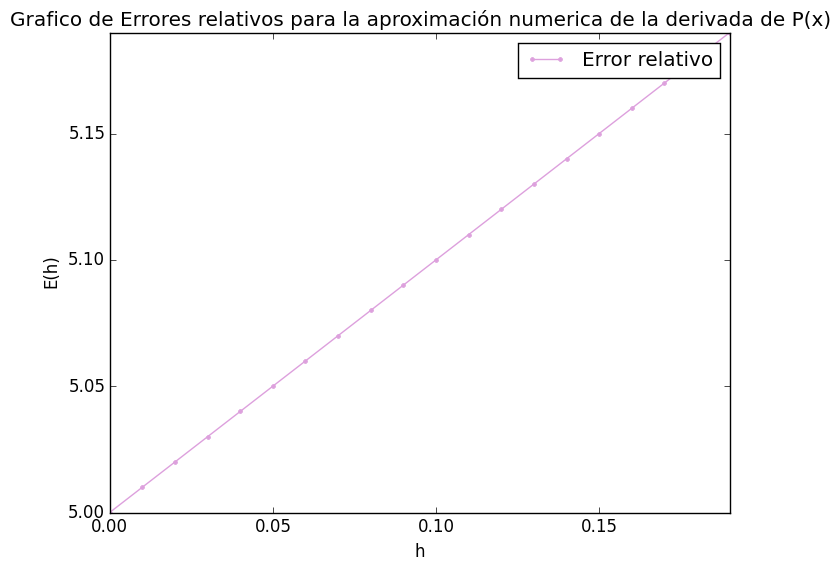

PyObject <matplotlib.legend.Legend object at 0x31c8bc790>

In [50]:
plot(H, Errores_P,color = "plum",marker=".", label="Error relativo")
xlabel("h")
ylabel("E(h)")
title("Grafico de Errores relativos para la aproximación numerica de la derivada de P(x)")
Ax = axis("tight")
plt.legend()

La relación entre $h$ y $E(h)$ es lineal y, cuando $h \rightarrow 0$, también $E(h) \rightarrow 0$.

Ahora haremos lo mismo para la función Transcendental $T(x)$.

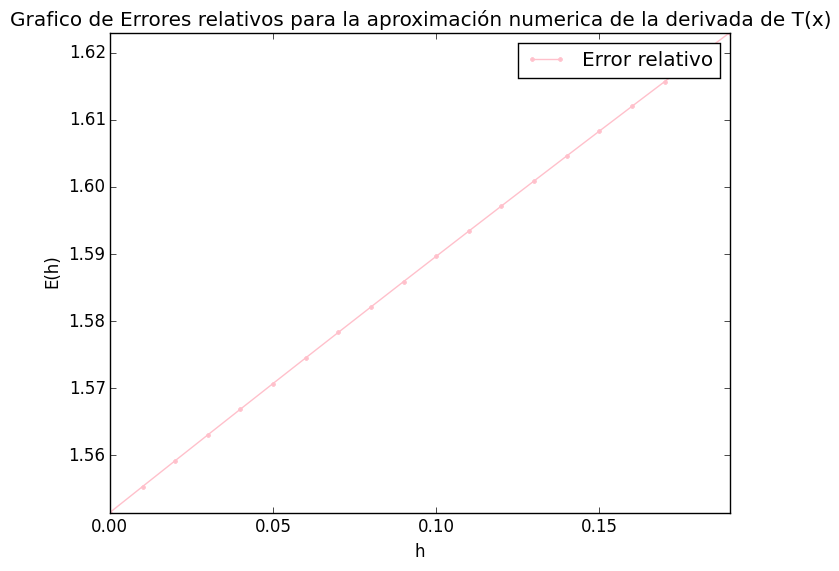

PyObject <matplotlib.legend.Legend object at 0x31cd3d550>

In [52]:
plot(H, Errores_T,color = "pink",marker=".", label="Error relativo")
xlabel("h")
ylabel("E(h)")
title("Grafico de Errores relativos para la aproximación numerica de la derivada de T(x)")
Ax = axis("tight")
plt.legend()

Observamos el mismo comportamiento: Lineal y con $\lim_{h \rightarrow 0} E(h) = 0$.

Consideremos ahora una función arbitraria definida por el usuario como $f(x)$.
Para determinar la derivada numérica como lo hemos estado haciendo, es necesario evaluar esta función en un intervalo de puntos.

In [55]:
#Definimos:
dX = 0.01
X = [1:dX:10]

901-element Array{Float64,1}:
  1.0 
  1.01
  1.02
  1.03
  1.04
  1.05
  1.06
  1.07
  1.08
  1.09
  1.1 
  1.11
  1.12
  ⋮   
  9.89
  9.9 
  9.91
  9.92
  9.93
  9.94
  9.95
  9.96
  9.97
  9.98
  9.99
 10.0 

Planteamos una función arbitraria del tipo cínico:
$$f(x) = 2 e^{-x}$$
Con derivada analítica:
$$\frac{df}{dx}(x) = -2e^{-x}$$

In [56]:
F(x) = 2*exp(-x)
dF(x) = -2*exp(-x)

dF (generic function with 1 method)

Basta con construir un arreglo de puntos para evaluar la función.
Yo elegiré un intervalo bastante pequeño porque quiero hacer evidente el error de orden $h$ entre el resultado analítico y el calculado por **derivada1**.

In [57]:
δX = 0.00001
X = [0:δX:0.02]

2001-element Array{Float64,1}:
 0.0    
 1.0e-5 
 2.0e-5 
 3.0e-5 
 4.0e-5 
 5.0e-5 
 6.0e-5 
 7.0e-5 
 8.0e-5 
 9.0e-5 
 0.0001 
 0.00011
 0.00012
 ⋮      
 0.01989
 0.0199 
 0.01991
 0.01992
 0.01993
 0.01994
 0.01995
 0.01996
 0.01997
 0.01998
 0.01999
 0.02   

Y con hacer:

In [58]:
DerivadaF = derivada1(F, X, 0.001)

2001-element Array{Float64,1}:
 -1.999  
 -1.99898
 -1.99896
 -1.99894
 -1.99892
 -1.9989 
 -1.99888
 -1.99886
 -1.99884
 -1.99882
 -1.9988 
 -1.99878
 -1.99876
  ⋮      
 -1.95963
 -1.95961
 -1.95959
 -1.95957
 -1.95955
 -1.95954
 -1.95952
 -1.9595 
 -1.95948
 -1.95946
 -1.95944
 -1.95942

Y a continuación comparamos nuestra solución analítica `dF(x)` con la obtenida mediante el método **derivada1** en `DerivadaF`:


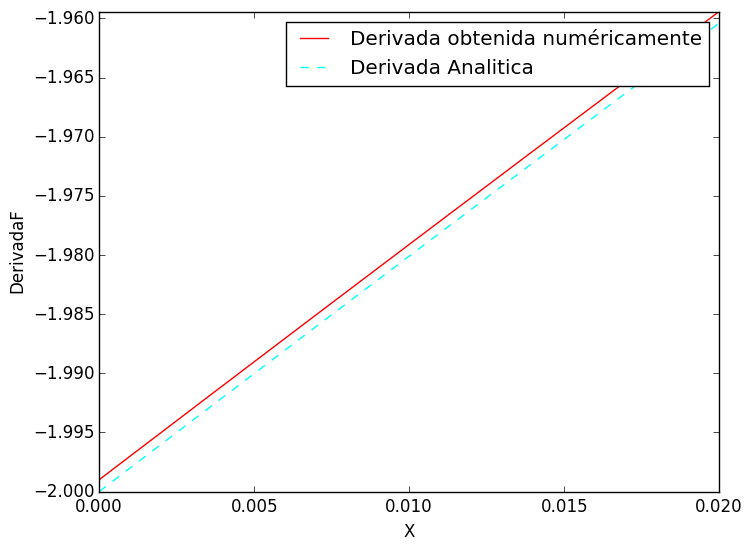

PyObject <matplotlib.legend.Legend object at 0x322dbe610>

In [23]:
plot(X, DerivadaF,color="red", label="Derivada obtenida numéricamente")
plot(X, dF(X), color = "cyan", linestyle="--",marker="None", label="Derivada Analitica")
#plot(X, F(X), color = "plum", linestyle="--",marker="None", label="Función Original")
xlabel("X")
ylabel("DerivadaF")
Ax = axis("tight")
plt.legend()

# Ejercicio 4

## Segunda Aproximación de Función Derivada:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}
$$

Definimos:

In [54]:
function derivada2(g,x0,h)
    dgdx = (g(x0 + h) - g(x0-h))/(2*h)
    return dgdx
end

derivada2 (generic function with 1 method)

Y utilizamos la siguiente función de prueba:
$$S(x) = sin(2x)$$
con derivada analítica:
$$ \frac{dS}{dx}(x) = 2cos(2x)$$
Implementamos ambas:

In [55]:
function S(x)
    return sin(2*x)
end
function dS(x)
    return 2*cos(2*x)
end

dS (generic function with 1 method)

 Y con el método de **derivada2** calculamos la derivada en un punto arbitrario, primero:
 $$\gamma = 1.7$$

In [59]:
γ=1.7
dS(γ)

-1.9335963851589222

Guardamos los errores relativos, calculados con la fórmula anterior.

In [60]:
γ=1.7
H =[1e-7:1e-2:2e-1]
Errores_Derivada2 = Float64[]
Error_D2 = 0

for h in H
    DerivadaS = derivada2(S, γ, h)
    Error_D2 = abs((DerivadaS - dS(γ)) / dS(γ))
    push!(Errores_Derivada2, Error_D2)
end

Graficando... (Hemos respetado el mismo rango de H's que para las gráficas anteriores.)

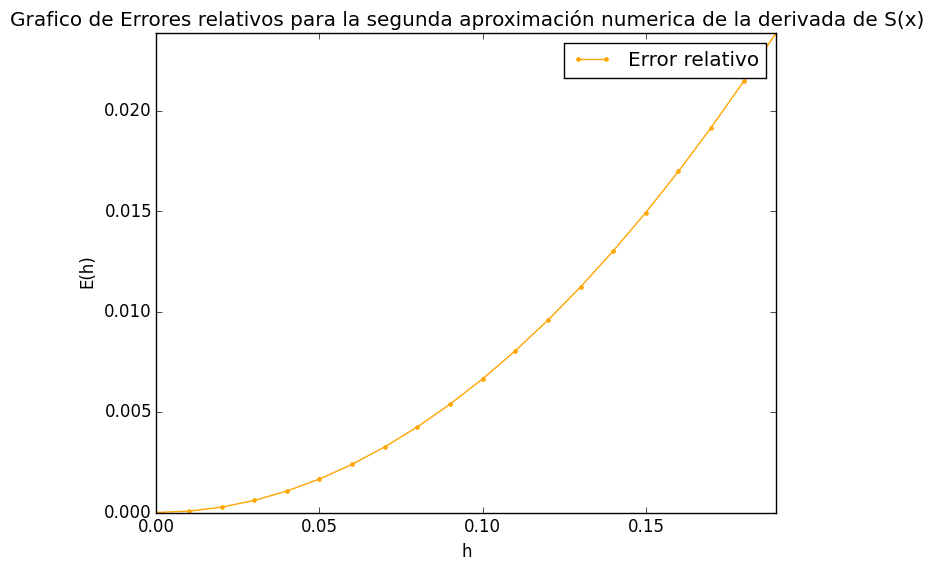

PyObject <matplotlib.legend.Legend object at 0x31d468710>

In [62]:
plot(H, Errores_Derivada2,color = "orange",marker=".", label="Error relativo")
xlabel("h")
ylabel("E(h)")
title("Grafico de Errores relativos para la segunda aproximación numerica de la derivada de S(x)")
Ax = axis("tight")
plt.legend()

Ahora la relación ente $h$ y $E(h)$ ya no es lineal.
El límite $\lim_{h \rightarrow 0} E(h) = 0$ se respeta, pero esta vez, el *desplome* del error $E$ tiene forma *cuadrática*.

### ¿Por qué?

El método descrito por:
$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}
$$
se conoce en la literatura como *Método de diferencias Centradas*.
Considera incrementos de $h$ adelante y atrás del punto $f(x0)$, consiguiendo promediar dos métodos: uno de ellos utilizado en **derivada1**, el de *Diferencias Hacia Adelante*; y el de *Diferencias Hacia Atrás*.

Esto nos permite obtener una estimación del del error en **derivada2** de:
$$E(h) \approx O(h^2)$$

El método de **derivada2** tiene una mayor convergencia.


# Referencias

1. Super Wikipedia: <https://es.wikipedia.org/wiki/Derivaci%C3%B3n_num%C3%A9rica>